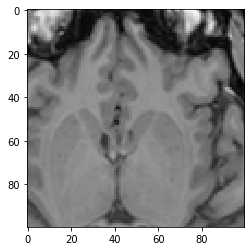

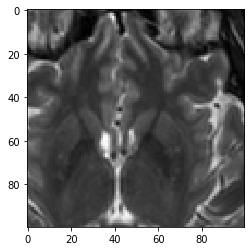

In [215]:
import torch
import nibabel as nib
import imageio
import matplotlib.pyplot as plt
import numpy
import glob
import os
import torch.utils.data.dataset

# NIfTI Dataset
class NIfTIDataset(Dataset):
    
    def load_file_names(self):
        self.t1_files = sorted(glob.glob(os.path.join(self.t1_base_path, '*.nii.gz')))
        self.t2_files = sorted(glob.glob(os.path.join(self.t2_base_path, '*.nii.gz')))
    
    def __init__(self, t1_base_path, t2_base_path):
        self.t1_base_path = t1_base_path
        self.t2_base_path = t2_base_path
        self.load_file_names()
        
    def __getitem__(self, idx):
        self.dataset = (nib.load(self.t1_files[idx]).get_fdata(), nib.load(self.t2_files[idx]).get_fdata())
        return self.dataset
    
    def __len__(self):
        return len(self.t1_files)

# Crop a slice for a given x,y coordinates and length and width
def crop_image(img, frame_x, frame_y, frame_x_length, frame_y_length):
    return img[0][frame_y:frame_y_length, frame_x:frame_x_length], img[1][frame_y:frame_y_length, frame_x:frame_x_length]

# Get a slice from an MR
def get_mr_slice(img, slce):
    return img[0][:,slce,:], img[1][:,slce,:]

nifti = NIfTIDataset("data/t1/", "data/t2/")

# Get the Dataset
imgdata = nifti.__getitem__(0)

# Get the slices from T1  & T2
slice = get_mr_slice(imgdata, 150)

# Crop those slices
cropped = crop_image(slice, 50, 50, 150, 150)

# Display T1
plt.imshow(cropped[0], cmap="gray")
plt.show()

# Display T2
plt.imshow(cropped[1], cmap="gray")
plt.show()